# Differential equations

In [138]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

## Plot the family of solutions for different ODEs

In [13]:
x = sp.symbols('x', cls=sp.Function)
t = sp.symbols('t')
de1 = sp.Eq(x(t).diff(t), - t / x(t))
de1

Eq(Derivative(x(t), t), -t/x(t))

In [14]:
sol1 = sp.dsolve(de1)
for sol in sol1:
    display(sol)

Eq(x(t), -sqrt(C1 - t**2))

Eq(x(t), sqrt(C1 - t**2))

In [7]:
def plot_solutions(t, x, sols, trange, crange, figsize=(6, 6)):
    plt.rcParams['figure.figsize'] = figsize
    acc_plot = None
    for c in crange:
        for sol in sols:
            plot = sp.plot(
                sol.rhs.subs({sp.symbols('C1'): c}), (t, *trange(c)), 
                show=False)
            if acc_plot is None:
                acc_plot = plot
            else:
                acc_plot.append(plot[0])
    acc_plot.show()

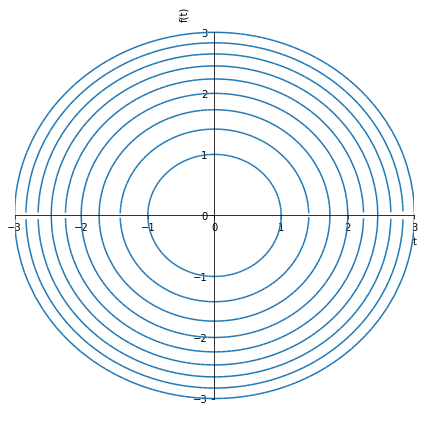

In [16]:
plot_solutions(t, x, sol1, lambda c: (-np.sqrt(c), np.sqrt(c)), range(1, 10))

In [17]:
x = sp.symbols('x', cls=sp.Function)
t = sp.symbols('t')
de2 = sp.Eq(x(t).diff(t), t / x(t) ** 2)
de2

Eq(Derivative(x(t), t), t/x(t)**2)

In [18]:
sol2 = sp.dsolve(de2)
for sol in sol2:
    display(sol)

Eq(x(t), (C1 + 3*t**2/2)**(1/3))

Eq(x(t), (-1 - sqrt(3)*I)*(C1 + 3*t**2/2)**(1/3)/2)

Eq(x(t), (-1 + sqrt(3)*I)*(C1 + 3*t**2/2)**(1/3)/2)

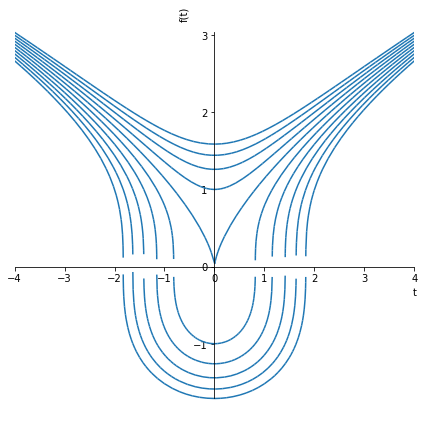

In [20]:
plot_solutions(t, x, sol2, lambda _: (-4, 4), range(-5, 5))

In [4]:
x = sp.symbols('x', cls=sp.Function)
t = sp.symbols('t')
de3 = sp.Eq(x(t).diff(t), (9 - 12*t -5*x(t)) / (5*t + 2*x(t) - 4))
de3

Eq(Derivative(x(t), t), (-12*t - 5*x(t) + 9)/(5*t + 2*x(t) - 4))

In [5]:
sol3 = sp.dsolve(de3)
for sol in sol3:
    display(sol)

Eq(x(t), -5*t/2 - sqrt(C1 + t**2 - 4*t)/2 + 2)

Eq(x(t), -5*t/2 + sqrt(C1 + t**2 - 4*t)/2 + 2)

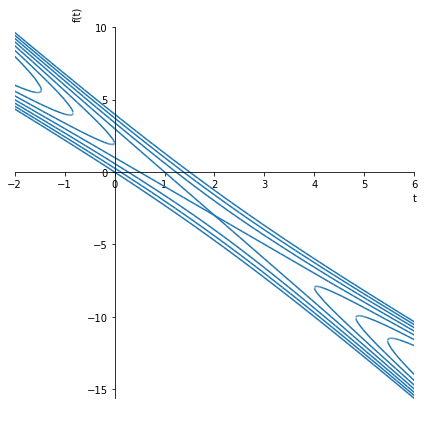

In [28]:
plot_solutions(t, x, sol3, lambda c: (-2, 6), range(-20, 20, 4))

In [32]:
x = sp.symbols('x', cls=sp.Function)
t = sp.symbols('t')
de4 = sp.Eq(x(t).diff(t), (t - x(t)) / (t + x(t)))
de4

Eq(Derivative(x(t), t), (t - x(t))/(t + x(t)))

In [33]:
sol4 = sp.dsolve(de4)
for sol in sol4:
    display(sol)

Eq(x(t), -t - sqrt(C1 + 2*t**2))

Eq(x(t), -t + sqrt(C1 + 2*t**2))

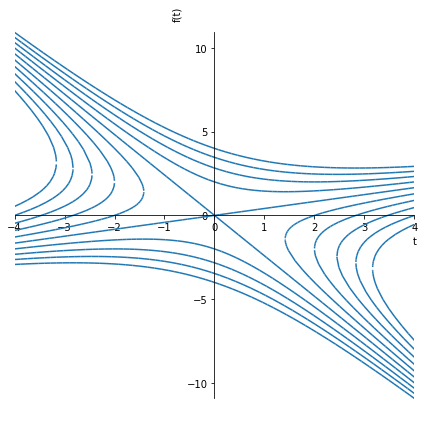

In [34]:
plot_solutions(t, x, sol4, lambda c: (-4, 4), range(-20, 20, 4))

## Solving an ODE using series and numerical approximation

In [428]:
x = sp.symbols('x', cls=sp.Function)
t = sp.symbols('t')
de5 = sp.Eq(x(t).diff(t, 2), 2*t**2*x(t).diff(t) + x(t))
de5

Eq(Derivative(x(t), (t, 2)), 2*t**2*Derivative(x(t), t) + x(t))

In [429]:
sol5 = sp.dsolve(de5, hint='2nd_power_series_ordinary', n=10)
sol5

Eq(x(t), C2*(103*t**8/5760 + 13*t**7/1260 + t**6/720 + t**5/10 + t**4/24 + t**2/2 + 1) + C1*t*(11*t**7/5040 + 23*t**6/720 + 7*t**5/180 + t**4/120 + t**3/6 + t**2/6 + 1) + O(t**10))

In [430]:
constant_values = sp.solve([sol5.rhs.subs(t, 0) - 1, sol5.rhs.diff(t).subs(t, 0)])
constant_values

{C1: 0, C2: 1}

In [431]:
sol5_vals = sol5.subs(constant_values)
sol5_vals

Eq(x(t), 1 + t**2/2 + t**4/24 + t**5/10 + t**6/720 + 13*t**7/1260 + 103*t**8/5760 + O(t**10))

In [432]:
sol5_numpy = sp.lambdify(t, sol5_vals.rhs.removeO(), 'numpy')

In [433]:
t = np.linspace(0, 4, 10000)

In [434]:
def ode5(variables, t):
    x, u = variables
    return [u, - 2*t**2*u - x]

In [435]:
sol5_num = odeint(ode5, [1, 0], t)[:, 0]

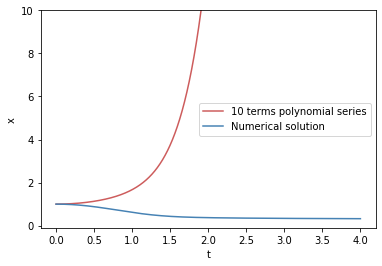

In [436]:
plt.figure(figsize=(6, 4))

plt.plot(t, sol5_numpy(t), color='indianred', label='10 terms polynomial series')
plt.plot(t, sol5_num, color='steelblue', label='Numerical solution')

plt.xlabel('t')
plt.ylabel('x')
plt.ylim((-0.1, 10))
plt.legend()
plt.show()

In [166]:
x = pd.Series(sol5_num)
t = pd.Series(t)

In [167]:
# x = pd.Series(sol5_numpy(t))

In [172]:
dt = t[1] - t[0]
dx = ((x.shift(-1) - x) / dt)[:-1]
ddx = ((dx.shift(-1) - dx) / dt)[:-1]

error = ddx + 2*t[:-2] ** 2 * dx[:-1] + x[:-2]

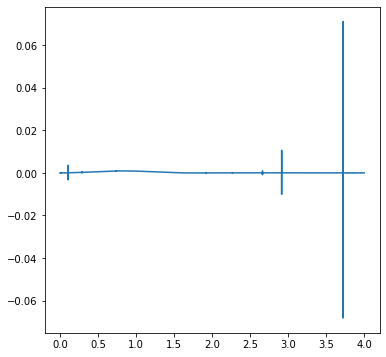

In [177]:
plt.plot(t[:-2], error)
plt.show()

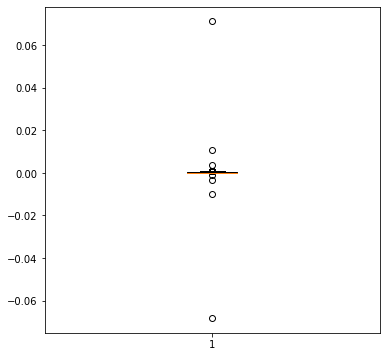

In [176]:
plt.boxplot(error)
plt.show()

## Phase space in chemical kinetics

In [248]:
c = sp.symbols('c', cls=sp.Function)
t, a_0, b_0, c_0, k = map(sp.symbols, ['t', 'a_0', 'b_0', 'c_0', 'k'])
de6 = sp.Eq(c(t).diff(t), k * (a_0 - c(t))**2 * (b_0 - c(t) / 2))
de6

Eq(Derivative(c(t), t), k*(a_0 - c(t))**2*(b_0 - c(t)/2))

In [249]:
sol6 = sp.dsolve(de6)
sol6

Eq(k*t/2 - 1/(-a_0**2 + 2*a_0*b_0 + (a_0 - 2*b_0)*c(t)) - log(-a_0**3/(2*(a_0 - 2*b_0)**2) + 3*a_0**2*b_0/(a_0 - 2*b_0)**2 - 6*a_0*b_0**2/(a_0 - 2*b_0)**2 - a_0/2 + 4*b_0**3/(a_0 - 2*b_0)**2 - b_0 + c(t))/(a_0 - 2*b_0)**2 + log(a_0**3/(2*(a_0 - 2*b_0)**2) - 3*a_0**2*b_0/(a_0 - 2*b_0)**2 + 6*a_0*b_0**2/(a_0 - 2*b_0)**2 - a_0/2 - 4*b_0**3/(a_0 - 2*b_0)**2 - b_0 + c(t))/(a_0 - 2*b_0)**2, C1)

In [252]:
sol6_val = sol6.subs(sp.symbols('C1'), sp.solve(sol6.rhs.subs(t, 0), sp.symbols('C1'))[0])
sol6_val

Eq(k*t/2 - 1/(-a_0**2 + 2*a_0*b_0 + (a_0 - 2*b_0)*c(t)) - log(-a_0**3/(2*(a_0 - 2*b_0)**2) + 3*a_0**2*b_0/(a_0 - 2*b_0)**2 - 6*a_0*b_0**2/(a_0 - 2*b_0)**2 - a_0/2 + 4*b_0**3/(a_0 - 2*b_0)**2 - b_0 + c(t))/(a_0 - 2*b_0)**2 + log(a_0**3/(2*(a_0 - 2*b_0)**2) - 3*a_0**2*b_0/(a_0 - 2*b_0)**2 + 6*a_0*b_0**2/(a_0 - 2*b_0)**2 - a_0/2 - 4*b_0**3/(a_0 - 2*b_0)**2 - b_0 + c(t))/(a_0 - 2*b_0)**2, 0)

In [377]:
constant_values = dict(a_0=4, b_0=1, k=0.00713)
y = sp.symbols('y')
concentration_curve = sol6_val.subs(constant_values).subs(c(t), y)
concentration_derivative = de6.rhs.subs(constant_values).subs(c(t), t)
display(concentration_curve)
display(concentration_derivative)

conc_der_np = sp.lambdify(t, concentration_derivative, 'numpy')

Eq(0.003565*t - log(y - 4)/4 + log(y - 2)/4 - 1/(2*y - 8), 0)

0.00713*(1 - t/2)*(4 - t)**2

In [346]:
a = c_g[15]

In [368]:
t_curr

400.0

In [392]:
concentration_curve.subs({sp.log(y - 4): sp.log(abs(y - 4))}).lhs

0.003565*t + log(y - 2)/4 - log(Abs(y - 4))/4 - 1/(2*y - 8)

In [401]:
eq_np = sp.lambdify([t, y], concentration_curve.lhs.subs({sp.log(y - 4): sp.log(abs(y - 4)), sp.log(y - 2): sp.log(abs(y - 2))}), 'numpy')

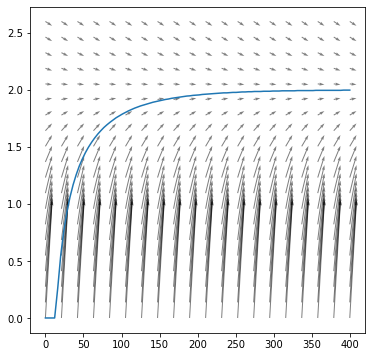

In [426]:
t_g = np.linspace(0, 400, 100)

def get_c(t_curr):
    vals = np.linspace(0, 2, 1000)
    return vals[np.argmin(np.abs(eq_np(t_curr, vals)))]
c_g = [get_c(t_curr) for t_curr in t_g]

x_g = np.linspace(0, 400, 20)
y_g = np.linspace(0, 2.6, 20)
x_g, y_g = np.meshgrid(x_g, y_g)

u = np.ones_like(x_g)
v = conc_der_np(y_g) * 400 / 2.6


plt.quiver(x_g, y_g, u, v, scale=50, alpha=0.5)
plt.plot(t_g, c_g)

plt.show()